In [1]:
### dr-mean (iPSCs), SNPs + STRs + SVs

In [2]:
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/Run_Output_PCA20_day0-PassQc_log_TPM_scater_libsize_206_exp_SV_eQTL/"

In [3]:
file = paste0(myfolder, "top_qtl_results_all.txt")
df = read.csv(file, sep="\t")

In [4]:
df

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,feature_id
17_80191922_T_*,7.434753e-05,0.1523447,0.03845219,0.1329987436,17,79825597,79829282,136,78,0.9604962,767.44045,NA,NA,1.0000000,ENSG00000141522
17_81018007_G_C,3.502918e-04,0.5511699,0.15417547,0.8633021121,17,80186273,80219005,136,78,0.8069870,2699.65919,NA,NA,1.0000000,ENSG00000141526
17_80667320_T_C,7.197600e-04,0.3655577,0.10809115,0.3555912555,17,80612849,80656604,136,78,0.6722640,871.28495,NA,NA,1.0000000,ENSG00000141542
17_80369128_G_A,1.937594e-03,0.1714031,0.05529785,0.5960435670,17,80196899,80231607,136,78,6.0031290,72.97961,NA,NA,1.0000000,ENSG00000141551
17_80637244_G_A,1.358695e-03,0.1559359,0.04868001,0.8583694242,17,79848666,79858867,136,78,0.6160519,378.87967,NA,NA,1.0000000,ENSG00000141552
17_80681175_A_G,1.161181e-06,0.4515647,0.09287348,0.0006140923,17,80709940,80900724,136,78,1.4744257,421.60245,NA,NA,1.0000000,ENSG00000141556
17_80501650_CTTT_CT,1.728302e-03,0.3603368,0.11500094,0.6830841657,17,80674559,80688204,136,78,1.0026029,324.01027,NA,NA,1.0000000,ENSG00000141560
17_80371829_G_C,6.981495e-05,0.3099331,0.07793304,0.1627004713,17,80416056,80448413,136,78,0.9636132,446.44071,NA,NA,1.0000000,ENSG00000141562
17_79525948_G_C,2.927023e-03,-0.2585888,0.08691185,0.7261869096,17,80477589,80602538,136,78,0.6066365,594.92701,NA,NA,1.0000000,ENSG00000141568
17_80993805_G_*,9.335651e-05,-0.7173864,0.18360440,0.0905631128,17,80278900,80291950,136,78,0.9154390,714.33145,NA,NA,1.0000000,ENSG00000141574


In [5]:
df$snp_id = as.character(df$snp_id)

In [6]:
nrow(df)

[1] 49030

In [7]:
library(qvalue)
df$qvalue = qvalue(df$empirical_feature_p_value)$qvalues
head(df,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,feature_id,qvalue
17_80191922_T_*,7.434753e-05,0.1523447,0.03845219,0.1329987,17,79825597,79829282,136,78,0.9604962,767.4405,NA,NA,1,ENSG00000141522,0.4939723
17_81018007_G_C,3.502918e-04,0.5511699,0.15417547,0.8633021,17,80186273,80219005,136,78,0.8069870,2699.6592,NA,NA,1,ENSG00000141526,1.0000000


In [8]:
nrow(df[df$qvalue<0.05,])

[1] 4793

In [9]:
# df_all = df
df = df[df$qvalue<0.05,]

In [10]:
length(df$snp_id[grep("Human_STR",df$snp_id)]) # short tandem repeats (STR)
length(df$snp_id[grep("DEL",df$snp_id)]) # deletions
length(df$snp_id[grep("CNV",df$snp_id)]) # copy number variation (CNV)

[1] 422

[1] 7

[1] 67

In [11]:
for (snp_id in df$snp_id){
    print(snp_id)}

[1] "17_80681175_A_G"
[1] "17_79630201_G_C"
[1] "17_79634162_T_G"
[1] "17_79595250_GAAAAA_*"
[1] "17_80449697_C_T"
[1] "17_80277088_G_A"
[1] "19_51240499_A_G"
[1] "19_52784658_G_A"
[1] "19_52262625_C_CA"
[1] "19_50189156_G_A"
[1] "Human_STR_697427"
[1] "Human_STR_697327"
[1] "19_49457093_AAAT_AAATAATAAT"
[1] "Human_STR_697427"
[1] "19_51564438_TCATCCATCCATCCATC_TCATCCATCCATC"
[1] "19_52818064_AAAAC_A"
[1] "9_94329094_A_G"
[1] "9_98656373_C_A"
[1] "9_94344018_CTT_CTTT"
[1] "9_90366695_A_*"
[1] "9_91187081_GA_G"
[1] "9_94394527_CAAAA_CAA"
[1] "9_90011944_GTTT_GTTTT"
[1] "9_94649586_T_C"
[1] "9_91201104_T_G"
[1] "9_97108345_G_A"
[1] "9_93860637_C_G"
[1] "1_22418260_C_CAA"
[1] "1_21767096_G_T"
[1] "1_20213575_CTT_CT"
[1] "Human_STR_13982"
[1] "1_19616016_GA_G"
[1] "1_24179995_C_T"
[1] "1_24479457_T_C"
[1] "1_25561667_G_A"
[1] "1_20306146_G_C"
[1] "1_24375689_G_C"
[1] "1_23853343_GCA_GCACACACACA"
[1] "Human_STR_14442"
[1] "1_23268893_TGTGC_T"
[1] "1_20783455_T_A"
[1] "1_20053546_G_T"
[1] "1

In [12]:
snp_chr = c()
snp_pos = c()
snp_ref = c()
snp_alt = c()
for (snp_id in df$snp_id){
#     print(snp_id)
    if (length(grep("STR",snp_id))>0 | length(grep("DEL",snp_id))>0 | length(grep("CNV",snp_id))>0 | 
        length(grep("rMEI",snp_id))>0 | length(grep("BND",snp_id))>0 | length(grep("ALU",snp_id))>0 |
       length(grep("DUP",snp_id))>0){
        chr = pos = ref = alt = "-"
    }
    else {
        line = unlist(strsplit(as.character(snp_id),"_"))
        chr = line[1]
        pos = line[2]
        ref = line[3]
        alt = line[4]
        }
    snp_chr = c(snp_chr, chr)
    snp_pos = c(snp_pos, pos)
    snp_ref = c(snp_ref, ref)
    snp_alt = c(snp_alt, alt)
}

In [13]:
df$snp_chr = snp_chr
df$snp_pos = snp_pos
df$snp_ref = snp_ref
df$snp_alt = snp_alt
head(df,140)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,call_rate,feature_id,qvalue,snp_chr,snp_pos,snp_ref,snp_alt
6,17_80681175_A_G,1.161181e-06,0.4515647,0.09287348,6.140923e-04,17,80709940,80900724,136,78,...,421.6024,NA,NA,1,ENSG00000141556,8.602555e-03,17,80681175,A,G
52,17_79630201_G_C,3.417861e-07,0.6758683,0.13255399,5.839041e-06,17,79632066,79633665,136,78,...,480.3989,NA,NA,1,ENSG00000204237,1.234001e-04,17,79630201,G,C
54,17_79634162_T_G,1.059745e-13,0.8578802,0.11541144,2.388728e-09,17,79648204,79650954,136,78,...,3272.9712,NA,NA,1,ENSG00000214087,7.243002e-08,17,79634162,T,G
58,17_79595250_GAAAAA_*,6.750169e-05,-0.6440818,0.16162963,7.714377e-08,17,79899745,79905477,136,78,...,813.0661,NA,NA,1,ENSG00000235296,2.045624e-06,17,79595250,GAAAAA,*
61,17_80449697_C_T,6.675397e-05,-0.5143451,0.12898716,6.112220e-06,17,81165854,81165944,136,78,...,460.8340,NA,NA,1,ENSG00000256692,1.286189e-04,17,80449697,C,T
75,17_80277088_G_A,1.796489e-05,-0.4505316,0.10504864,8.386472e-21,17,80753362,80753971,136,78,...,520.0646,NA,NA,1,ENSG00000263098,3.965176e-19,17,80277088,G,A
115,19_51240499_A_G,5.540803e-05,0.6844700,0.16977798,8.196003e-04,19,52022779,52035110,136,78,...,742.5413,NA,NA,1,ENSG00000105492,1.111618e-02,19,51240499,A,G
117,19_52784658_G_A,2.041216e-07,-0.6009988,0.11567580,8.785442e-289,19,52114781,52150151,136,78,...,555.9263,NA,NA,1,ENSG00000105501,6.626927e-286,19,52784658,G,A
149,19_52262625_C_CA,9.488489e-06,0.4586696,0.10357192,9.934903e-04,19,51870352,51872257,136,78,...,730.4230,NA,NA,1,ENSG00000160318,1.311546e-02,19,52262625,C,CA
171,19_50189156_G_A,2.926397e-09,0.6057410,0.10205091,1.776827e-07,19,50194155,50216988,136,78,...,512.8129,NA,NA,1,ENSG00000169169,4.525602e-06,19,50189156,G,A


In [14]:
c(nrow(df[nchar(df$snp_alt) > nchar(df$snp_ref),]),
  nrow(df[nchar(df$snp_alt) < nchar(df$snp_ref),]),
  nrow(df[nchar(df$snp_alt) == nchar(df$snp_ref),]))
nrow(df[nchar(df$snp_alt) >= nchar(df$snp_ref),]) + nrow(df[nchar(df$snp_alt) < nchar(df$snp_ref),]) + nrow(df[nchar(df$snp_alt) == nchar(df$snp_ref),])
nrow(df)

[1]  960  856 2993

[1] 7794

[1] 4793

In [15]:
snp_ids0 = df[nchar(df$snp_alt) > nchar(df$snp_ref),"snp_id"]
snp_ids1 = df[nchar(df$snp_alt) < nchar(df$snp_ref),"snp_id"]
snp_ids2 = df[nchar(df$snp_alt) == nchar(df$snp_ref),"snp_id"]

In [16]:
snp_ids0[snp_ids0 %in% snp_ids1]
snp_ids0[snp_ids0 %in% snp_ids2]
snp_ids1[snp_ids1 %in% snp_ids2]

[1] NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA

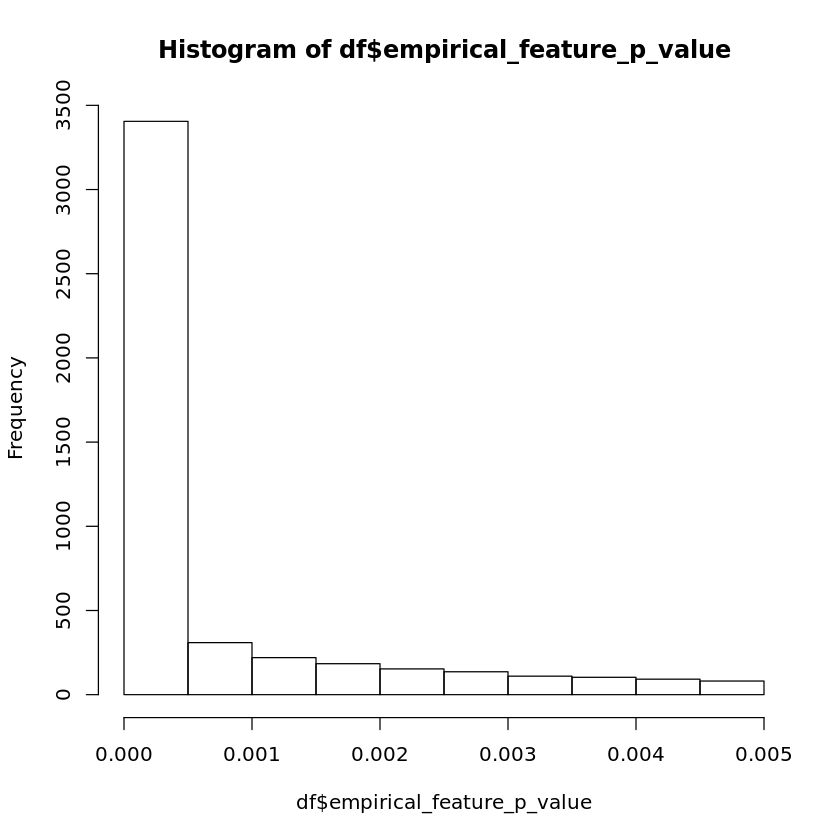

In [17]:
hist(df$empirical_feature_p_value)

In [18]:
# annotation file
anno_filename = "/hps/nobackup/hipsci/scratch/trans_eqtls/QTL_Mapping/snakemake/GeneLevel_Cis_WGS/Genotypes_V2/info_pass_nnref1_rna_398.tsv"

In [19]:
df_anno = read.csv(anno_filename, sep = "\t")
df_anno

ID,NONREF_AF_hipsci,ALLELES_DIST_hipsci,NNREF_hipsci,MAF_hipsci,MODE_hipsci,NONREF_AF_ipscore,ALLELES_DIST_ipscore,NNREF_ipscore,MAF_ipscore,...,bin_log10_SVLEN,bin_log10_SVLEN_capped,bin_log10_SVLEN_DS_RANGE,bin_log10_SVLEN_DS_RANGE_capped,super_category,genes_affected,num_genes_affected,start_variant,end_variant,ucsc_coords
CNV_1_55175_56534_HipSci,0.76063830,"1:82,0:48,3:11,2:45,4:2",143,0.56382979,1,0.776190476,"1:90,0:45,3:20,2:47,5:3,4:5",163,0.571428571,...,3.2,3.2,4.0,4.0,intergenic,,0,55175,56534,chr1:55175-56534
CNV_1_55175_56686_iPSCORE,0.76063830,"1:82,0:48,3:12,2:45,4:1",143,0.56382979,1,0.780952381,"1:90,0:45,3:20,2:46,5:3,4:6",164,0.571428571,...,3.2,3.2,4.0,4.0,intergenic,,0,55175,56686,chr1:55175-56686
CNV_1_84505_86406_HipSci,0.74468085,"1:79,0:40,3:21,2:48",140,0.57978723,1,0.676190476,"1:68,0:39,3:22,2:68,5:1,4:12",142,0.676190476,...,3.4,3.4,4.0,4.0,intergenic,,0,84505,86406,chr1:84505-86406
CNV_1_85058_87006_HipSci,0.76063830,"1:81,0:40,3:21,2:45,4:1",143,0.56914894,1,0.680952381,"1:69,0:39,3:21,2:67,4:14",143,0.671428571,...,3.4,3.4,4.0,4.0,intergenic,,0,85058,87006,chr1:85058-87006
CNV_1_85391_86406_iPSCORE,0.75531915,"1:80,0:40,3:22,2:46",142,0.57446809,1,0.695238095,"1:68,0:39,3:24,2:64,5:1,4:14",146,0.676190476,...,3.2,3.2,3.8,3.8,intergenic,,0,85391,86406,chr1:85391-86406
CNV_1_86406_89953_HipSci,0.77127660,"1:83,0:47,3:14,2:43,4:1",145,0.55851064,1,0.771428571,"1:90,0:44,3:23,2:48,5:1,4:4",162,0.571428571,...,3.6,3.6,4.4,4.4,intersects_exon,"ENSG00000238009,ENSG00000239945",2,86406,89953,chr1:86406-89953
CNV_1_86406_91299_iPSCORE,0.76595745,"1:83,0:47,3:13,2:44,4:1",144,0.55851064,1,0.766666667,"1:90,0:44,3:22,2:49,4:5",161,0.571428571,...,3.8,3.8,4.4,4.4,contains_gene,"ENSG00000238009,ENSG00000239945",2,86406,91299,chr1:86406-91299
CNV_1_564439_567804_iPSCORE,0.45212766,"12:1,1:39,0:2,3:31,2:103,5:1,4:3,7:6,9:1,8:1",85,0.45212766,2,0.552380952,"11:1,15:1,1:50,0:7,3:33,2:94,5:8,4:13,6:3",116,0.552380952,...,3.6,3.6,4.8,4.8,contains_gene,"ENSG00000198744,ENSG00000223659,ENSG00000225630,ENSG00000225972,ENSG00000229344,ENSG00000230021,ENSG00000237973,ENSG00000240409,ENSG00000248527",9,564439,567804,chr1:564439-567804
CNV_1_565396_567497_iPSCORE,0.44680851,"1:41,0:3,3:33,2:104,5:2,4:5",84,0.44680851,2,0.557142857,"1:51,0:9,3:41,2:93,4:16",117,0.557142857,...,3.4,3.4,4.2,4.2,intersects_exon,"ENSG00000223659,ENSG00000225630,ENSG00000229344,ENSG00000230021,ENSG00000237973,ENSG00000240409,ENSG00000248527",7,565396,567497,chr1:565396-567497
CNV_1_565396_567904_HipSci,0.44680851,"1:41,0:3,3:34,2:104,5:1,4:5",84,0.44680851,2,0.557142857,"16:1,18:1,1:50,0:8,3:41,2:93,5:1,4:13,7:2",117,0.557142857,...,3.4,3.4,4.8,4.8,intersects_exon,"ENSG00000198744,ENSG00000223659,ENSG00000225630,ENSG00000229344,ENSG00000230021,ENSG00000237973,ENSG00000240409,ENSG00000248527",8,565396,567904,chr1:565396-567904


In [20]:
ids1 = df$snp_id
ids2 = df_anno$ID
length(ids1)
length(ids2)
length(ids1[ids1 %in% ids2])

[1] 4793

[1] 651689

[1] 504

In [21]:
colnames(df_anno)

[1] "ID"                              "NONREF_AF_hipsci"               
 [3] "ALLELES_DIST_hipsci"             "NNREF_hipsci"                   
 [5] "MAF_hipsci"                      "MODE_hipsci"                    
 [7] "NONREF_AF_ipscore"               "ALLELES_DIST_ipscore"           
 [9] "NNREF_ipscore"                   "MAF_ipscore"                    
[11] "MODE_ipscore"                    "CHROM"                          
[13] "POS"                             "CALLER"                         
[15] "NONREF_AF_all_rna"               "ALLELES_DIST_all_rna"           
[17] "NNREF_all_rna"                   "SVTYPE"                         
[19] "FILTER"                          "MAF_all_rna"                    
[21] "MODE_all_rna"                    "NONREF_AF_consented"            
[23] "ALLELES_DIST_consented"          "NNREF_consented"                
[25] "MAF_consented"                   "MODE_consented"                 
[27] "num_passing_hipsci"              "num_missing_hipsci"             
[29] "percent_passing_hipsci"          "num_passing_ipscore"            
[31] "num_missing_ipscore"             "percent_passing_ipscore"        
[33] "num_passing_all_rna"             "num_missing_all_rna"            
[35] "percent_passing_all_rna"         "num_passing_consented"          
[37] "num_missing_consented"           "percent_passing_consented"      
[39] "END"                             "ALLELES_DIST_DICT_all_rna"      
[41] "ALLELES_all_rna"                 "MIN_ALLELE_all_rna"             
[43] "MAX_ALLELE_all_rna"              "SUBTYPE_all_rna"                
[45] "ALLELES_DIST_DICT_consented"     "ALLELES_consented"              
[47] "MIN_ALLELE_consented"            "MAX_ALLELE_consented"           
[49] "SUBTYPE_consented"               "SVTYPE_all_rna"                 
[51] "SVTYPE_consented"                "ID.1"                           
[53] "NR_ID"                           "SVTYPE_NR"                      
[55] "ALLELES_DIST_DICT_ipscore"       "ALLELES_DIST_DICT_hipsci"       
[57] "NMODE_all_rna"                   "NMODE_AF_all_rna"               
[59] "NMODE_consented"                 "NMODE_AF_consented"             
[61] "NMODE_ipscore"                   "NMODE_AF_ipscore"               
[63] "NMODE_hipsci"                    "NMODE_AF_hipsci"                
[65] "SVLEN"                           "MAX_ALLELE_CHANGE"              
[67] "ALLELE_DIFF"                     "SVLEN_DS_RANGE"                 
[69] "MHC"                             "VDJ"                            
[71] "centromere"                      "seg_dupe"                       
[73] "pseudo_auto"                     "is_SVLEN"                       
[75] "log10_SVLEN"                     "log10_SVLEN_DS_RANGE"           
[77] "bin_log10_SVLEN"                 "bin_log10_SVLEN_capped"         
[79] "bin_log10_SVLEN_DS_RANGE"        "bin_log10_SVLEN_DS_RANGE_capped"
[81] "super_category"                  "genes_affected"                 
[83] "num_genes_affected"              "start_variant"                  
[85] "end_variant"                     "ucsc_coords"

In [22]:
df_anno$SVTYPE_all_rna = as.character(df_anno$SVTYPE_all_rna)
unique(df_anno$SVTYPE_all_rna)

[1] "mCNV"  "BND"   "DUP"   "STR"   "DEL"   "rMEI"  "SVA"   "ALU"   "INV"  
[10] "LINE1"

In [23]:
df1 = df[,c("snp_id","p_value","beta","beta_se","empirical_feature_p_value","feature_id","qvalue")]
df2 = df_anno[,c("ID","SVTYPE_all_rna","SVTYPE_NR","SVTYPE_consented")]
df2$snp_id = as.character(df2$ID)

In [24]:
library(dplyr)
df3 = inner_join(df1,df2)
head(df3)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Joining, by = "snp_id"


snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_id,qvalue,ID,SVTYPE_all_rna,SVTYPE_NR,SVTYPE_consented
Human_STR_697427,3.501908e-08,-2.3995413,0.43514964,4.751129e-03,ENSG00000174562,4.887701e-02,Human_STR_697427,STR,STR,STR
Human_STR_697327,2.908219e-04,-0.7076590,0.19530566,4.679850e-03,ENSG00000180279,4.829574e-02,Human_STR_697327,STR,STR,STR
Human_STR_697427,5.151663e-09,-1.3622250,0.23316996,5.273502e-155,ENSG00000268595,1.279999e-152,Human_STR_697427,STR,STR,STR
Human_STR_13982,7.486281e-05,0.4845017,0.12234035,1.902089e-04,ENSG00000176378,3.080920e-03,Human_STR_13982,STR,STR,STR
Human_STR_14442,2.220444e-08,0.9260710,0.16555061,1.235338e-06,ENSG00000218510,2.834283e-05,Human_STR_14442,STR,STR,STR
Human_STR_16237,5.110604e-05,-0.3830647,0.09457195,1.999677e-74,ENSG00000239106,2.021530e-72,Human_STR_16237,STR,STR,STR


In [25]:
nrow(df2)
nrow(df3)

[1] 651689

[1] 504

In [26]:
SV_types = unique(df3$SVTYPE_all_rna)
for (SV_type in SV_types){
    print(paste0(SV_type,": ", nrow(df3[df3$SVTYPE_all_rna == SV_type,])))
}

[1] "STR: 422"
[1] "mCNV: 54"
[1] "BND: 2"
[1] "DEL: 14"
[1] "rMEI: 3"
[1] "ALU: 3"
[1] "DUP: 6"


In [27]:
df3[df3$SVTYPE_all_rna == "DEL",]

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_id,qvalue,ID,SVTYPE_all_rna,SVTYPE_NR,SVTYPE_consented
38,DEL_11_5521632_5523171,1.677062e-05,0.5206279,0.12096240,3.854467e-06,ENSG00000254831,8.351061e-05,DEL_11_5521632_5523171,DEL,DEL,DEL
89,CNV_3_75593962_75615989_Stitched,4.036780e-07,0.5552137,0.10956980,5.670814e-05,ENSG00000244026,1.027874e-03,CNV_3_75593962_75615989_Stitched,DEL,DEL,DEL
143,CNV_19_6779011_6781094_HipSci,2.715479e-04,-0.5623220,0.15444030,2.222443e-03,ENSG00000263995,2.603737e-02,CNV_19_6779011_6781094_HipSci,DEL,DEL,DEL
223,DEL_13_32532648_32538801,8.348511e-05,0.6842788,0.17393225,1.125854e-03,ENSG00000229427,1.462268e-02,DEL_13_32532648_32538801,DEL,DEL,DEL
261,DEL_9_35980788_35981992,1.899885e-03,0.2277858,0.07335031,2.606997e-11,ENSG00000243136,8.907391e-10,DEL_9_35980788_35981992,DEL,DEL,DEL
264,DEL_4_93360757_93361508,6.540066e-08,0.6725536,0.12446930,9.256146e-05,ENSG00000248750,1.599115e-03,DEL_4_93360757_93361508,DEL,DEL,DEL
265,DEL_4_93360757_93361508,2.907437e-10,0.9325663,0.14794102,3.127326e-05,ENSG00000249239,5.883838e-04,DEL_4_93360757_93361508,DEL,DEL,DEL
274,DEL_22_24274144_24311297,4.578613e-12,-1.1627811,0.16807900,7.280367e-08,ENSG00000272787,1.934723e-06,DEL_22_24274144_24311297,DEL,DEL,DEL
282,CNV_6_32623503_32624632_HipSci,7.446891e-13,1.3497770,0.18822799,1.112474e-06,ENSG00000179344,2.566806e-05,CNV_6_32623503_32624632_HipSci,DEL,DEL,DEL
289,CNV_14_23109659_23110812_iPSCORE,1.012903e-04,-0.3587280,0.09227777,3.601019e-37,ENSG00000211784,2.298932e-35,CNV_14_23109659_23110812_iPSCORE,DEL,DEL,DEL


In [28]:
df4 = df[!(df$snp_id %in% df3$snp_id),]
nrow(df4)

[1] 4289

In [29]:
nrow(df)
nrow(df3) + nrow(df4)

[1] 4793

[1] 4793

In [30]:
head(df4)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,call_rate,feature_id,qvalue,snp_chr,snp_pos,snp_ref,snp_alt
6,17_80681175_A_G,1.161181e-06,0.4515647,0.09287348,6.140923e-04,17,80709940,80900724,136,78,...,421.6024,NA,NA,1,ENSG00000141556,8.602555e-03,17,80681175,A,G
52,17_79630201_G_C,3.417861e-07,0.6758683,0.13255399,5.839041e-06,17,79632066,79633665,136,78,...,480.3989,NA,NA,1,ENSG00000204237,1.234001e-04,17,79630201,G,C
54,17_79634162_T_G,1.059745e-13,0.8578802,0.11541144,2.388728e-09,17,79648204,79650954,136,78,...,3272.9712,NA,NA,1,ENSG00000214087,7.243002e-08,17,79634162,T,G
58,17_79595250_GAAAAA_*,6.750169e-05,-0.6440818,0.16162963,7.714377e-08,17,79899745,79905477,136,78,...,813.0661,NA,NA,1,ENSG00000235296,2.045624e-06,17,79595250,GAAAAA,*
61,17_80449697_C_T,6.675397e-05,-0.5143451,0.12898716,6.112220e-06,17,81165854,81165944,136,78,...,460.8340,NA,NA,1,ENSG00000256692,1.286189e-04,17,80449697,C,T
75,17_80277088_G_A,1.796489e-05,-0.4505316,0.10504864,8.386472e-21,17,80753362,80753971,136,78,...,520.0646,NA,NA,1,ENSG00000263098,3.965176e-19,17,80277088,G,A


In [31]:
c(nrow(df4[nchar(df4$snp_alt) > nchar(df4$snp_ref),]),
  nrow(df4[nchar(df4$snp_alt) < nchar(df4$snp_ref),]),
  nrow(df4[nchar(df4$snp_alt) == nchar(df4$snp_ref),]))
nrow(df4[nchar(df4$snp_alt) > nchar(df4$snp_ref),]) + nrow(df4[nchar(df4$snp_alt) < nchar(df4$snp_ref),]) + nrow(df4[nchar(df4$snp_alt) == nchar(df4$snp_ref),])
nrow(df4)

[1]  960  856 2489

[1] 4305

[1] 4289

In [32]:
# df4[nchar(df4$snp_alt) > nchar(df4$snp_ref),]
# df4[nchar(df4$snp_alt) < nchar(df4$snp_ref),]
df4[nchar(df4$snp_alt) == nchar(df4$snp_ref),]

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,call_rate,feature_id,qvalue,snp_chr,snp_pos,snp_ref,snp_alt
6,17_80681175_A_G,1.161181e-06,0.4515647,0.09287348,6.140923e-04,17,80709940,80900724,136,78,...,421.6024,NA,NA,1,ENSG00000141556,8.602555e-03,17,80681175,A,G
52,17_79630201_G_C,3.417861e-07,0.6758683,0.13255399,5.839041e-06,17,79632066,79633665,136,78,...,480.3989,NA,NA,1,ENSG00000204237,1.234001e-04,17,79630201,G,C
54,17_79634162_T_G,1.059745e-13,0.8578802,0.11541144,2.388728e-09,17,79648204,79650954,136,78,...,3272.9712,NA,NA,1,ENSG00000214087,7.243002e-08,17,79634162,T,G
61,17_80449697_C_T,6.675397e-05,-0.5143451,0.12898716,6.112220e-06,17,81165854,81165944,136,78,...,460.8340,NA,NA,1,ENSG00000256692,1.286189e-04,17,80449697,C,T
75,17_80277088_G_A,1.796489e-05,-0.4505316,0.10504864,8.386472e-21,17,80753362,80753971,136,78,...,520.0646,NA,NA,1,ENSG00000263098,3.965176e-19,17,80277088,G,A
115,19_51240499_A_G,5.540803e-05,0.6844700,0.16977798,8.196003e-04,19,52022779,52035110,136,78,...,742.5413,NA,NA,1,ENSG00000105492,1.111618e-02,19,51240499,A,G
117,19_52784658_G_A,2.041216e-07,-0.6009988,0.11567580,8.785442e-289,19,52114781,52150151,136,78,...,555.9263,NA,NA,1,ENSG00000105501,6.626927e-286,19,52784658,G,A
171,19_50189156_G_A,2.926397e-09,0.6057410,0.10205091,1.776827e-07,19,50194155,50216988,136,78,...,512.8129,NA,NA,1,ENSG00000169169,4.525602e-06,19,50189156,G,A
263,9_94329094_A_G,5.014510e-06,0.9568420,0.20964160,3.197468e-04,9,95218487,95244788,136,78,...,523.0749,NA,NA,1,ENSG00000106819,4.852116e-03,9,94329094,A,G
295,9_98656373_C_A,6.056047e-08,-0.7741602,0.14290943,5.427793e-08,9,98521513,98638259,136,78,...,358.1340,NA,NA,1,ENSG00000175611,1.456621e-06,9,98656373,C,A


In [33]:
tail(df4)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,beta_param,snp_chromosome,snp_position,call_rate,feature_id,qvalue,snp_chr,snp_pos,snp_ref,snp_alt
48985,5_124881833_AT_ATT,1.268583e-05,-0.3844249,0.08806067,1.994060e-08,5,124372524,124377932,136,78,...,166.1421,NA,NA,1,ENSG00000250411,5.545589e-07,5,124881833,AT,ATT
48991,5_116467369_GTT_GT,1.934259e-03,-0.3850655,0.12420887,2.204263e-36,5,116355244,116355375,136,78,...,173.5386,NA,NA,1,ENSG00000250650,1.385577e-34,5,116467369,GTT,GT
48993,5_123809920_ATGTGTG_ATGTGTGTG,5.300990e-04,-0.3257268,0.09400302,6.545190e-89,5,124601221,124601344,136,78,...,358.5971,NA,NA,1,ENSG00000250721,7.808045e-87,5,123809920,ATGTGTG,ATGTGTGTG
49011,5_124095087_CTT_CTTT,1.970511e-03,-0.4518653,0.14601539,1.565638e-22,5,123731640,123736348,136,78,...,267.4295,NA,NA,1,ENSG00000251662,7.746038e-21,5,124095087,CTT,CTTT
49013,5_118838771_TTGTGTG_TTGTGTGTG,3.633634e-04,-0.3004484,0.08426884,1.092519e-158,5,119673244,119673348,136,78,...,340.3660,NA,NA,1,ENSG00000251975,2.746984e-156,5,118838771,TTGTGTG,TTGTGTGTG
49027,5_126250459_A_AACACACACACAC,1.462020e-04,-0.3406077,0.08969419,3.299761e-291,5,126512388,126512742,136,78,...,233.9104,NA,NA,1,ENSG00000271585,2.568052e-288,5,126250459,A,AACACACACACAC


In [34]:
snp_ids0 = as.character(df4[nchar(df4$snp_alt) > nchar(df4$snp_ref),"snp_id"])
snp_ids1 = as.character(df4[nchar(df4$snp_alt) < nchar(df4$snp_ref),"snp_id"])
snp_ids2 = as.character(df4[nchar(df4$snp_alt) == nchar(df4$snp_ref),"snp_id"])

In [35]:
length(snp_ids0)
length(snp_ids1)
length(snp_ids2)
length(snp_ids2[grep("\\*",snp_ids2)])

[1] 960

[1] 856

[1] 2489

[1] 60

In [57]:
df_to_plot = data.frame(value = c(960+856+60, 2489-60, 422, 504-422), group = c("Indels","SNVs","STRs","SVs"))

In [58]:
n_indels = 960+856+60
n_snps = 2489-60
n_svs = 504-422
n_strs = 422
tot = n_indels+n_snps+n_svs+n_strs

In [62]:
tot

[1] 4809

In [59]:
n_snps/tot
n_indels/tot
n_svs/tot
n_strs/tot

[1] 0.5050946

[1] 0.3901019

[1] 0.01705136

[1] 0.08775213

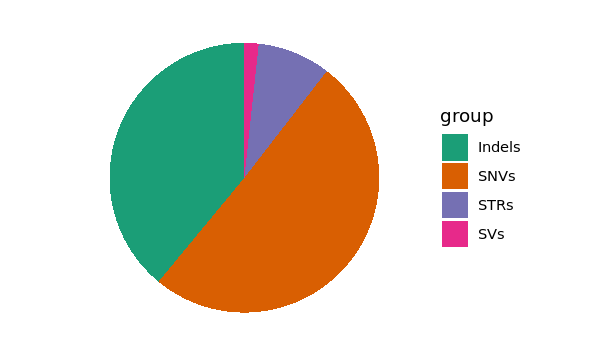

In [60]:
library(ggplot2)
library(scales)
# Barplot
bp<- ggplot(df_to_plot, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")

blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold")
  )

pie <- bp + coord_polar("y", start=0) + theme_minimal() + blank_theme + theme(axis.text.x=element_blank())
options(repr.plot.width = 5, repr.plot.height = 3)
pie + scale_fill_brewer(palette="Dark2") 

In [40]:
snp_ids0[snp_ids0 %in% snp_ids1]
snp_ids0[snp_ids0 %in% snp_ids2]
snp_ids1[snp_ids1 %in% snp_ids2]

[1] NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA

In [41]:
for (snp_id in df4$snp_id){
    print(snp_id)}

[1] "17_80681175_A_G"
[1] "17_79630201_G_C"
[1] "17_79634162_T_G"
[1] "17_79595250_GAAAAA_*"
[1] "17_80449697_C_T"
[1] "17_80277088_G_A"
[1] "19_51240499_A_G"
[1] "19_52784658_G_A"
[1] "19_52262625_C_CA"
[1] "19_50189156_G_A"
[1] "19_49457093_AAAT_AAATAATAAT"
[1] "19_51564438_TCATCCATCCATCCATC_TCATCCATCCATC"
[1] "19_52818064_AAAAC_A"
[1] "9_94329094_A_G"
[1] "9_98656373_C_A"
[1] "9_94344018_CTT_CTTT"
[1] "9_90366695_A_*"
[1] "9_91187081_GA_G"
[1] "9_94394527_CAAAA_CAA"
[1] "9_90011944_GTTT_GTTTT"
[1] "9_94649586_T_C"
[1] "9_91201104_T_G"
[1] "9_97108345_G_A"
[1] "9_93860637_C_G"
[1] "1_22418260_C_CAA"
[1] "1_21767096_G_T"
[1] "1_20213575_CTT_CT"
[1] "1_19616016_GA_G"
[1] "1_24179995_C_T"
[1] "1_24479457_T_C"
[1] "1_25561667_G_A"
[1] "1_20306146_G_C"
[1] "1_24375689_G_C"
[1] "1_23853343_GCA_GCACACACACA"
[1] "1_23268893_TGTGC_T"
[1] "1_20783455_T_A"
[1] "1_20053546_G_T"
[1] "1_24385331_G_T"
[1] "18_28937474_T_G"
[1] "18_33038184_ATT_AT"
[1] "18_29569875_T_C"
[1] "18_29804906_G_A"
[1] "18

In [42]:
df4$genetic_class = "SNV"
df4[df4$snp_id %in% c(snp_ids0, snp_ids1, snp_ids2[grep("\\*",snp_ids2)]),"genetic_class"] = "Indel"
df3$genetic_class = df3$SVTYPE_all_rna
df_to_plot2 = rbind(df3[,c("beta","snp_id","genetic_class")],df4[,c("beta","snp_id","genetic_class")])

In [43]:
head(df_to_plot2)

beta,snp_id,genetic_class
-2.3995413,Human_STR_697427,STR
-0.7076590,Human_STR_697327,STR
-1.3622250,Human_STR_697427,STR
0.4845017,Human_STR_13982,STR
0.9260710,Human_STR_14442,STR
-0.3830647,Human_STR_16237,STR


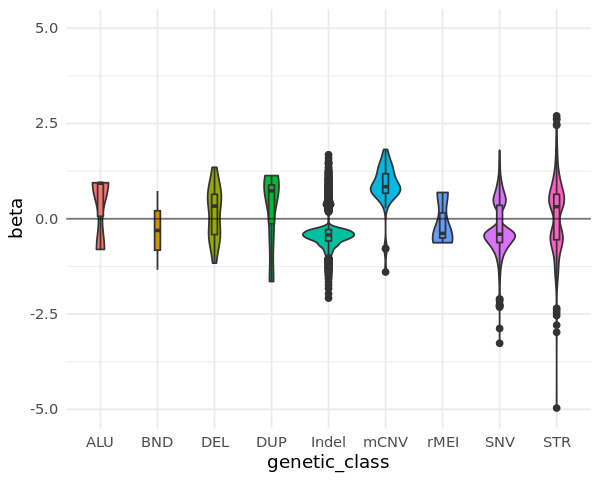

In [44]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df_to_plot2, aes(x = genetic_class, y = beta, fill = genetic_class)) + geom_violin() + 
        geom_boxplot(width=0.1) + theme_minimal() + theme(legend.position = "none") + ylim(c(-5,5)) + 
        geom_hline(yintercept = 0, alpha=0.5)# + geom_hline(yintercept = c(3,2,1,-1,-2,-3), alpha=0.1)

Picking joint bandwidth of 0.28


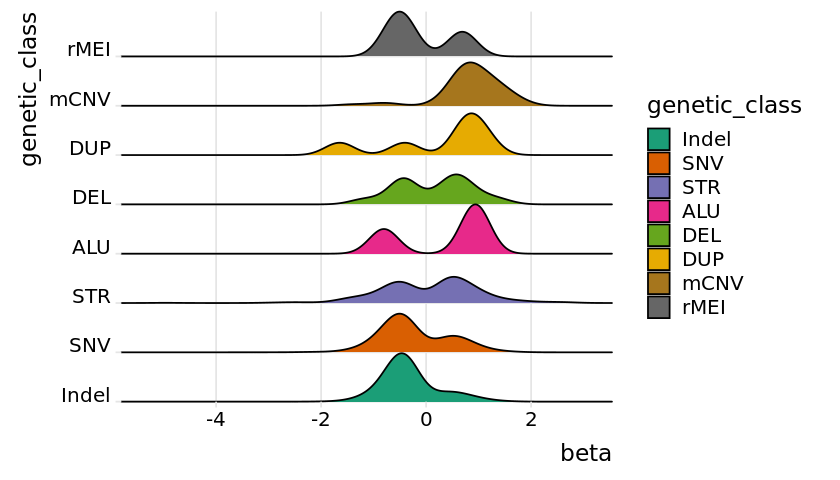

In [61]:
### update using colours as above

options(repr.plot.width = 7, repr.plot.height = 4)
library(ggridges)

df_to_plot3 = df_to_plot2[df_to_plot2$genetic_class != "BND",]

df_to_plot3$genetic_class <- factor(df_to_plot3$genetic_class,
                levels = c("Indel","SNV","STR","ALU","DEL","DUP","mCNV","rMEI"))
    
ggplot(df_to_plot3, aes(x = beta, y = genetic_class, fill = genetic_class)) +
  geom_density_ridges(scale = 1) + 
  scale_y_discrete(expand = c(0, 0)) +     # will generally have to set the `expand` option
  scale_x_continuous(expand = c(0, 0)) +   # for both axes to remove unneeded padding
  coord_cartesian(clip = "off") + # to avoid clipping of the very top of the top ridgeline
  theme_ridges() + scale_fill_brewer(palette="Dark2") 

Picking joint bandwidth of 0.28


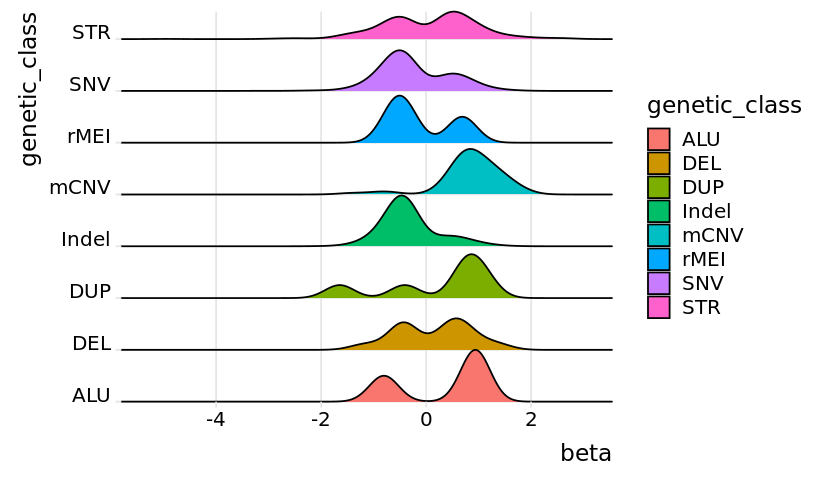

In [154]:
options(repr.plot.width = 7, repr.plot.height = 4)
library(ggridges)
    
ggplot(df_to_plot2[df_to_plot2$genetic_class != "BND",], aes(x = beta, y = genetic_class, fill = genetic_class)) +
  geom_density_ridges(scale = 1) + 
  scale_y_discrete(expand = c(0, 0)) +     # will generally have to set the `expand` option
  scale_x_continuous(expand = c(0, 0)) +   # for both axes to remove unneeded padding
  coord_cartesian(clip = "off") + # to avoid clipping of the very top of the top ridgeline
  theme_ridges()